In [2]:
import csv

f= open('Fish.csv', 'r')
data = csv.reader(f)

header = next(data)

perch_weight = [] #농어의 무게
perch_length = [] #농어의 길이

for row in data:
    if row[0] == 'Perch':
        perch_weight.append(float(row[1]))
        perch_length.append(float(row[3]))

f.close()
print('농어의 무게: ', perch_weight) #타켓
print('농어의 길이: ', perch_length) #인풋

print(type(perch_weight))

농어의 무게:  [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0, 1000.0]
농어의 길이:  [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
<class 'list'>


In [4]:
import numpy as np
weight = np.array(perch_weight)
length = np.array(perch_length)

print('weight =', weight)
print('length =', length)

weight = [   5.9   32.    40.    51.5   70.   100.    78.    80.    85.    85.
  110.   115.   125.   130.   120.   120.   130.   135.   110.   130.
  150.   145.   150.   170.   225.   145.   188.   180.   197.   218.
  300.   260.   265.   250.   250.   300.   320.   514.   556.   840.
  685.   700.   700.   690.   900.   650.   820.   850.   900.  1015.
  820.  1100.  1000.  1100.  1000.  1000. ]
length = [ 8.4 13.7 15.  16.2 17.4 18.  18.7 19.  19.6 20.  21.  21.  21.  21.3
 22.  22.  22.  22.  22.  22.5 22.5 22.7 23.  23.5 24.  24.  24.6 25.
 25.6 26.5 27.3 27.5 27.5 27.5 28.  28.7 30.  32.8 34.5 35.  36.5 36.
 37.  37.  39.  39.  39.  40.  40.  40.  40.  42.  43.  43.  43.5 44. ]


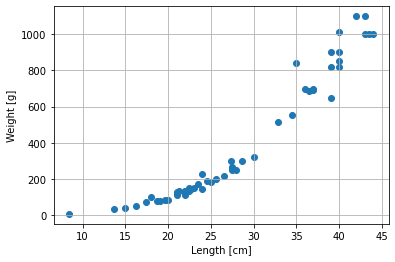

In [10]:
import matplotlib.pyplot as plt
plt.scatter(length,weight)
plt.xlabel('Length [cm]')
plt.ylabel('Weight [g]')
plt.grid(True)
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(length, weight, random_state=42)

print("train_input: ", train_input.shape)
print("test_input: ", test_input.shape)

#42 : 14 / 3:1 로 섞임


train_input:  (42,)
test_input:  (14,)


In [20]:
test_array = np.array([1,2,3,4])
print(test_array)
print(test_array.shape)

test_array = test_array.reshape(4,1)

print(test_array)
print(test_array.shape)

[1 2 3 4]
(4,)
[[1]
 [2]
 [3]
 [4]]
(4, 1)


In [24]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

print(train_input.shape, test_input.shape)

# print(train_input)

(42, 1) (14, 1)


In [26]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target) # 길이, 무게/ 학습 데이터셋을 이용해서 학습시킴

KNeighborsRegressor()

In [27]:
knr.score(test_input, test_target)

0.992809406101064

In [32]:
#평균 절대값 오차 (MAE, Mean Absolute Error)
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)
print(test_prediction)
print(test_target)

[  60.    79.6  248.   122.   136.   847.   311.4  183.4  847.   113.
 1010.    60.   248.   248. ]
[   5.9  100.   250.   130.   130.   820.   320.   188.   900.   125.
 1000.    51.5  250.   300. ]


In [45]:
mae = mean_absolute_error(test_target, test_prediction) # 실제값, 예측값 -> 평균절대값, 오차값 반환
print(mae)  # k-NN 회귀 알고리즘이 평균 약 19g 정도 오차를 가지고 예측

19.157142857142862


In [ ]:
# overfitting / underfitting

In [39]:
print('시험데이터셋의 결정계수: ', knr.score(test_input, test_target))
print('학습데이터셋의 결정계수: ', knr.score(train_input, train_target))

시험데이터셋의 결정계수:  0.992809406101064
학습데이터셋의 결정계수:  0.9698823289099254


In [40]:
print(knr.n_neighbors)

5


In [42]:
knr.n_neighbors = 3

knr.fit(train_input, train_target)
print('시험데이터셋의 결정계수: ', knr.score(test_input, test_target))
print('학습데이터셋의 결정계수: ', knr.score(train_input, train_target))

시험데이터셋의 결정계수:  0.9746459963987609
학습데이터셋의 결정계수:  0.9804899950518966
